In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
import students_functions as sf
import missingno as msno
import pandas_profiling 



pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

students = pd.read_csv('stud_math.csv')

In [78]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Основная задача нашего проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Одна из основных проблем встречающихся в датасетах - отсутствующие значения (NaN). То ессть работать с таким типом данных будет невозможно. Проверим для начала, как обстоятdela в нашем датасете:

In [21]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Выясним, сколько у нас не хватает значений в каждой колонке:

In [2]:
sf.missing_values_table(students)

В датафрейме содержится 30 колонок.
В 27 колонках есть отсутствующие значения.


,Отсутствующие значения,% от общего кол-ва
Pstatus,45,11.4
paid,40,10.1
famsup,39,9.9
Fjob,36,9.1
internet,34,8.6
romantic,31,7.8
guardian,31,7.8
traveltime,28,7.1
famrel,27,6.8
famsize,27,6.8


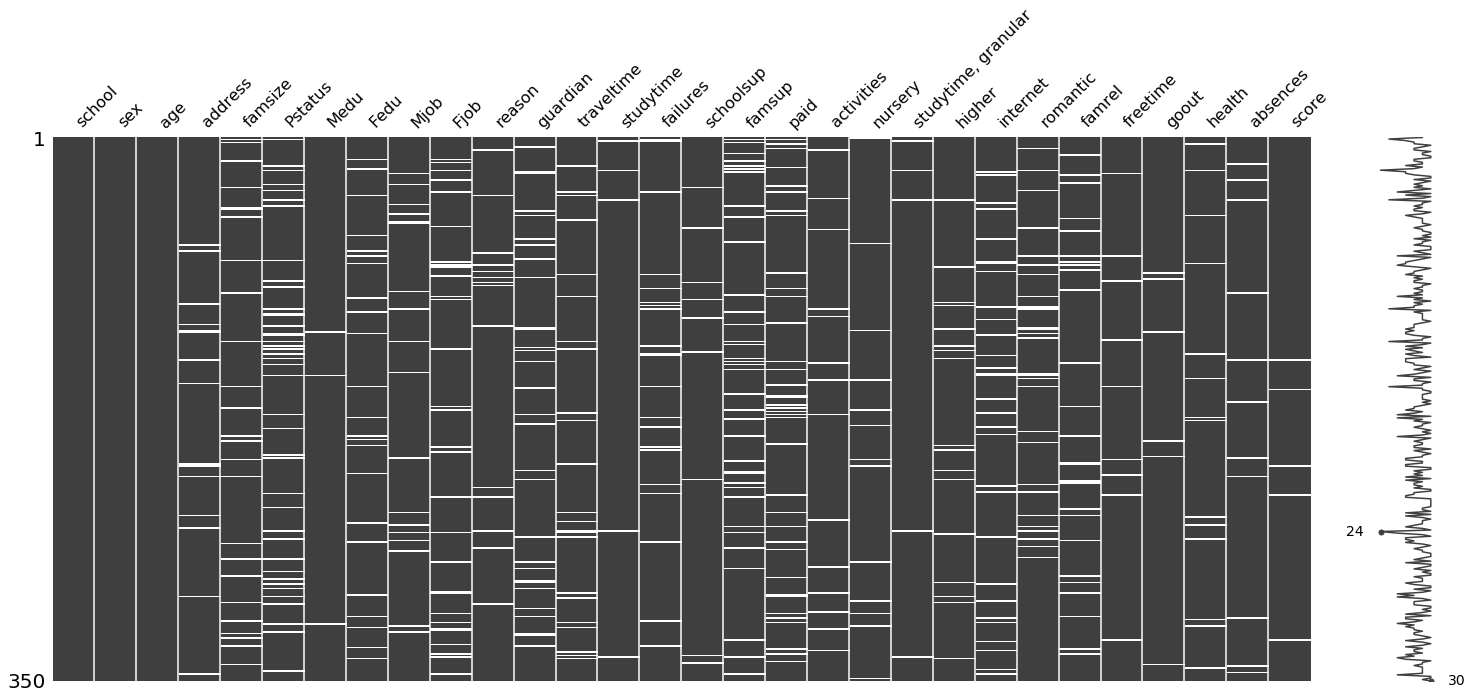

In [18]:
msno.matrix(students.sample(350))

Можно заметить , что всего в 3 колонках присутствуют все значения : school, sex,age. В то же время, нет колонок со слишком большим количеством отсутсвующих данных  (максимум 11.4%)

Теперь проверим на повторяющиеся значения :

In [6]:
len(students[students.duplicated()])


0

Таковых не обнаружено 

Поскольку процент отсутствующих значений невелик , вероятно, будет возможным заменить их  на наиболее часто встречающиеся , без ущерба для дальнейшего анализа.

In [19]:
for column in students.columns:
    students[column].fillna(students[column].mode()[0], inplace=True)

## EDA

Наша цель - отследить влияние различных факторов на успеваемость по математике

Проверим распределение оценок в целевой переменной с помощью гистограммы 

### score

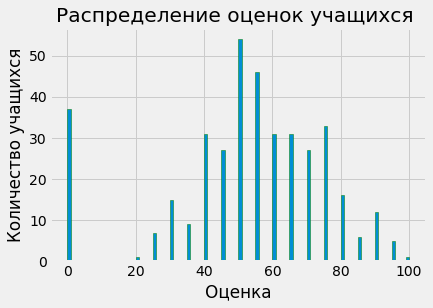

In [15]:
plt.style.use('fivethirtyeight')
plt.hist(students['score'].dropna(), bins = 100, edgecolor = 'g');
plt.xlabel('Оценка'); plt.ylabel('Количество учащихся'); 
plt.title('Распределение оценок учащихся ');

Подозрительно много учащихся получили оценку 0 .Проверим на выбросы:

In [11]:
sf.quantiles_info(students.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


Несмотря на кажущуюся аномалию все в пределах нормы, хотя оценки оставляют желать лучшего 50% впределах от 40 до 70 

## Частотное распределение и выбросы

Теперь рассмотрим чстотное распределение всех переменных 

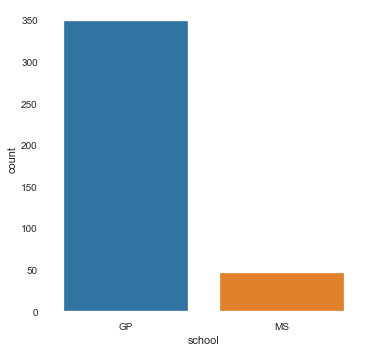

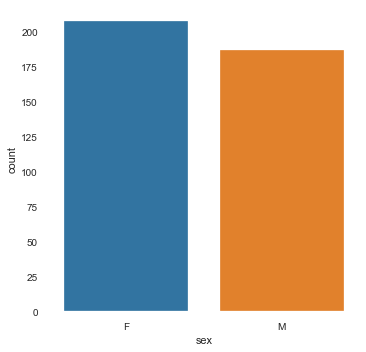

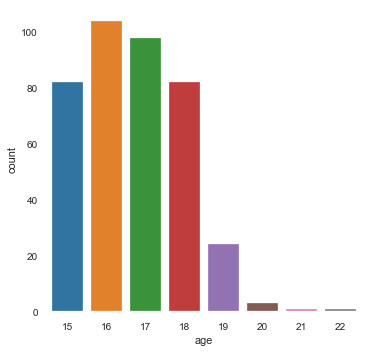

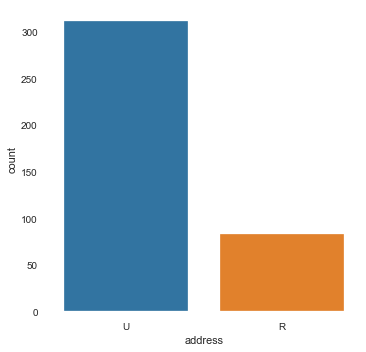

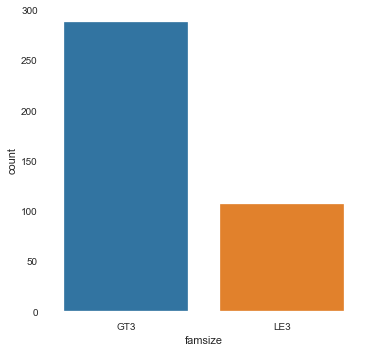

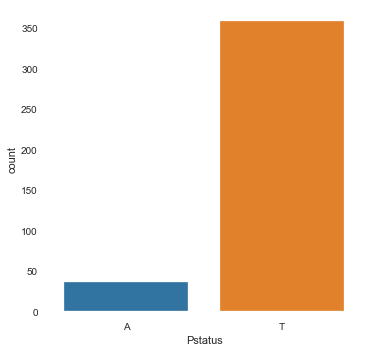

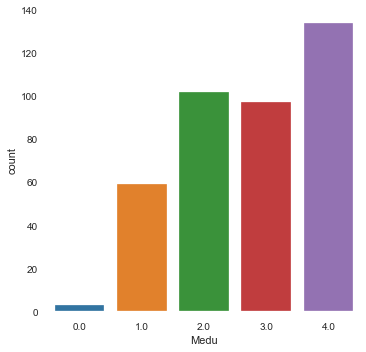

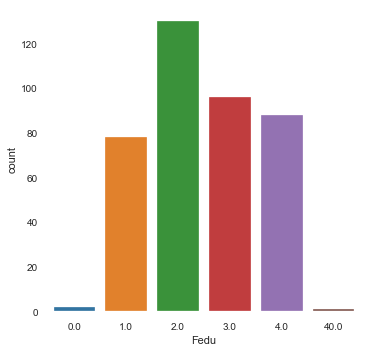

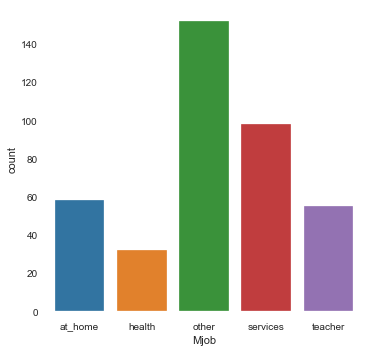

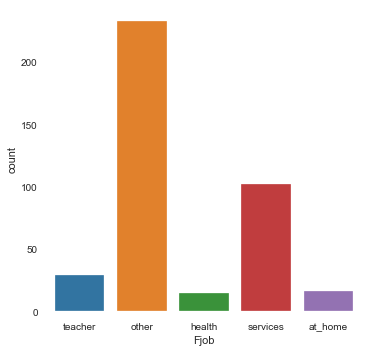

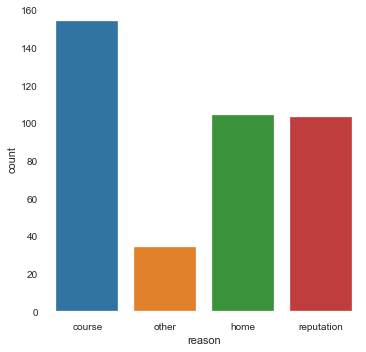

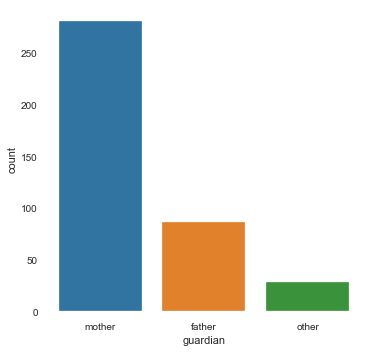

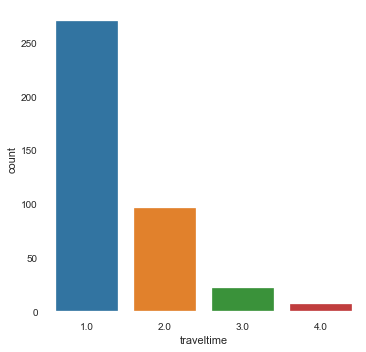

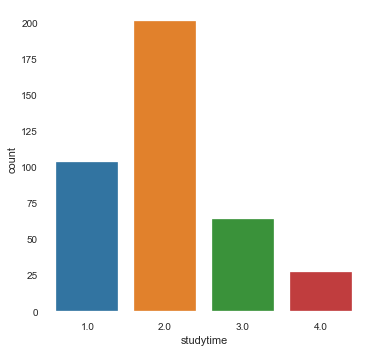

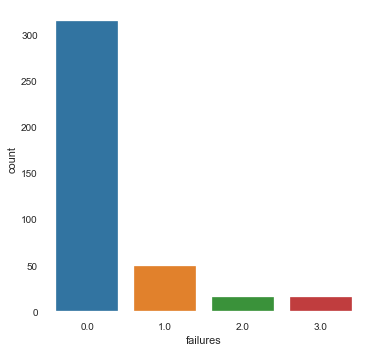

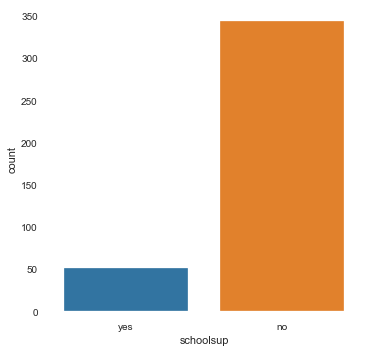

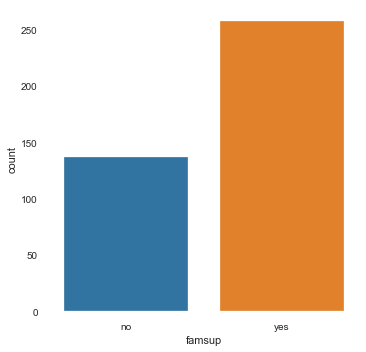

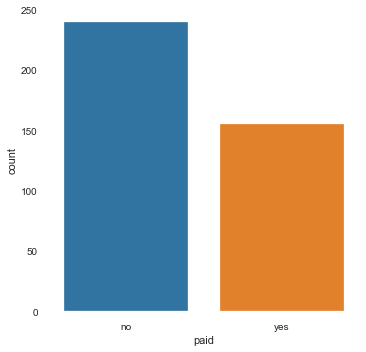

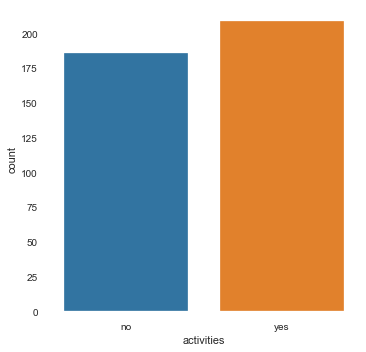

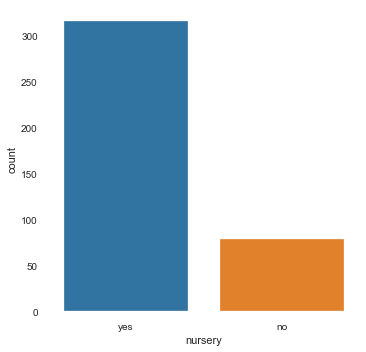

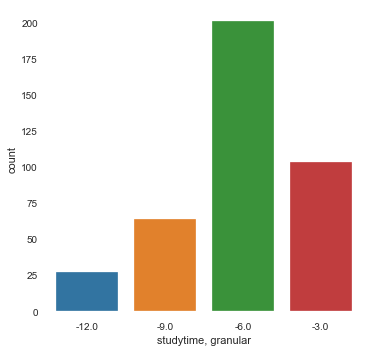

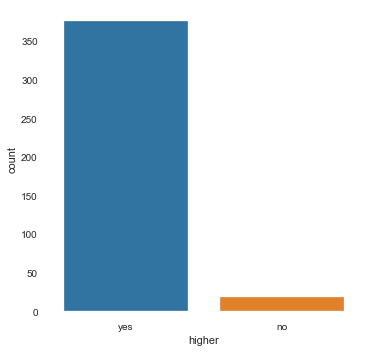

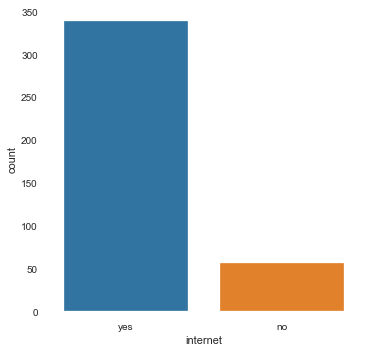

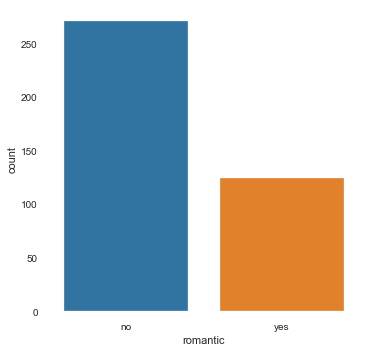

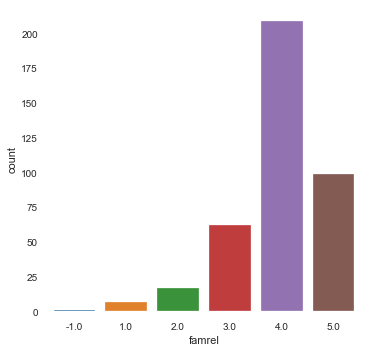

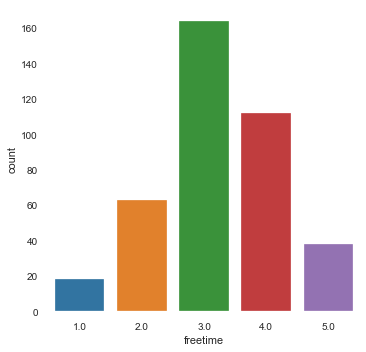

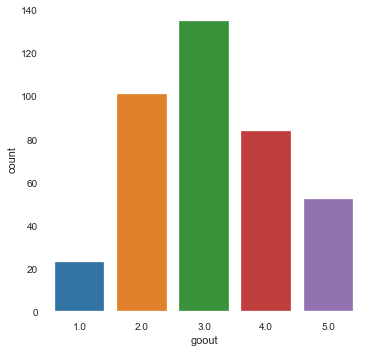

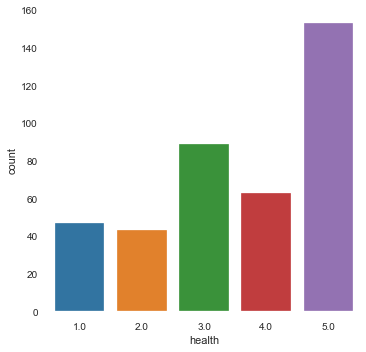

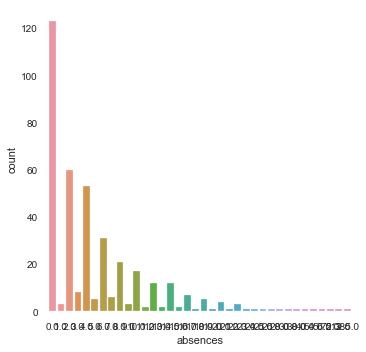

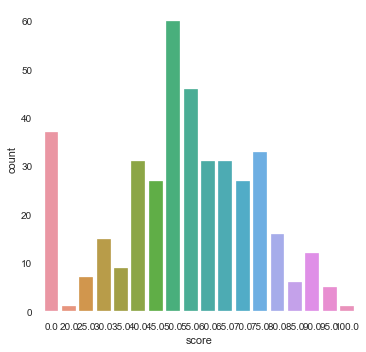

In [26]:
for c in students.columns:
    fig = sns.catplot(x=c, kind="count", data=students)
    plt.show()
    

Значения в двух переменных выглядят подозрительно и скорее всего были внесены ошибочно.
В колонке Fedu слишком высокое значение 40 (скорее всего имелось ввиду 4), а в колонке famrel слишком низкое -1 (скорее всего имелось ввиду 1). Скорее всего, мы обнаружим это дальше в качестве выброса. 

## Проверка на выбросы

Проверим данные на  возможные выбросы

In [3]:
numeric_features = students.select_dtypes(include=[np.number])


In [10]:
for column in numeric_features:
    print (column)
    sf.quantiles_info(students[column])
    print('\n')

age
Есть выбросы
Минимальное значение: 15, 
Максимальное значение: 22, 
Границы выбросов: [13.0, 21.0], 
25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0, 


Medu
Нет выбросов


Fedu
Есть выбросы
Минимальное значение: 0.0, 
Максимальное значение: 40.0, 
Границы выбросов: [0.5, 4.5], 
25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0, 


traveltime
Есть выбросы
Минимальное значение: 1.0, 
Максимальное значение: 4.0, 
Границы выбросов: [-0.5, 3.5], 
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0, 


studytime
Есть выбросы
Минимальное значение: 1.0, 
Максимальное значение: 4.0, 
Границы выбросов: [-0.5, 3.5], 
25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0, 


failures
Есть выбросы
Минимальное значение: 0.0, 
Максимальное значение: 3.0, 
Границы выбросов: [0.0, 0.0], 
25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0, 


studytime, granular
Есть выбросы
Минимальное значение: -12.0, 
Максимальное значение: -3.0, 
Границы выбросов: [-10.5, 1.5], 
25-й перцентиль: -6.

Выбросы есть в 9-ти колонках ,проверим все ли они логически оправданы и удалим при необходимости 

age : Несмотря на то , что 22 года допустимый возраст согласно описанию переменной -статистически это выброс , исправим :

In [8]:
students = students[students.age <= 21]

Fedu: Сильно выбивается из допустимых пределов (мы это видели и на графиках) , исправим :

In [11]:
students = students[students.Fedu <= 4.5]

traveltime: Также приведем в должный вид :

In [12]:
students = students[students.traveltime <= 3.5]

studytime: Не возникает подозрений и вопросов ,испаравляем : 

In [14]:
students = students[students.studytime <= 3.5]

failures: Несомненно, статистически - это выброс , но количество внеучебных неудач, может сильно влиять на оценку , наверное, не стоит изменять тут ничего. Оставим пока, как есть... 

studytime, granular : По поводу этой переменной возникают дополнительные вопросы , да и не знаем  мы точно, что она подразумевает ) . Оставим ее как есть (пока)

famrel: Видели уже на графиках ,что тут есть проблема - исправим :

In [15]:
students = students[students.famrel >= 2.5]

freetime : Ничего необычного -исправляем :

In [16]:
students = students[students.freetime >= 1.5]

absences: Тут скорее здравый смысл , отрицательных значений быть не может вовсе , а слишком большое может сильно повлиять на целевую переменную , поэтому оставим ,как есть , без изменений.

score: В целевой переменной выбросов нет 

## Корреляционный анализ 

Проверим корреляцию между переменными и сконцентрируемся на отношении целевой  к остальным переменным

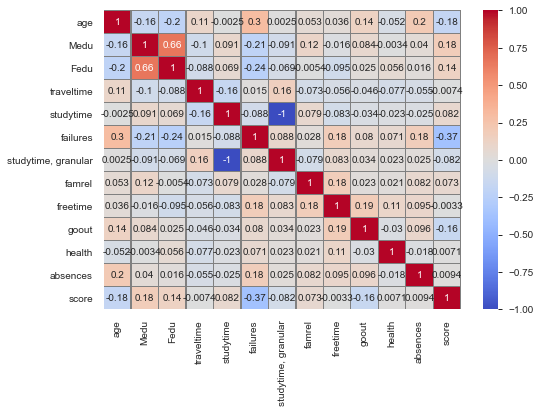

In [22]:
sns.heatmap(students.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.3, linecolor='grey')

Первое , что бросается в глаза, это две переменных которые полностью коррелируют : studytime, granular и study_time.Корреляция –1 указывает на идеально линейную отрицательную зависимость, что означает, что когда одна переменная возрастает, другая понижается.Таким образом , нет смысла использовать два идентичных значения. О первой и нас есть информация , ее и оставим удалим

In [6]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

Как можно увидеть , есть несколько параметров влияющих явно отрицательно:  failures , age, goout, traveltime, health и  несколько влияющих положительно Fedu,studytime,Medu, , кроме этого есть значения близкие к нулю  , которые не практически влияют на оценку : freetime, famrel,absences, - не будем принимать их  во внимание, а в итоге удалим.

Попытаемся разобраться :  
failures (кстати, хорошо , что не произвели изменения в связи с выброссами) очевидно, что провалы не связанные с учебой сильно влияют на успеваемость и чем и больше , тем ниже будет оценка.  
age - чем  младше, тем ниже оценки - переходный возраст, и нежелание думать о будущем.  
goout -  логично больше времени на развлечения , меньше на учебу - хуже результат.  
traveltime - длительные поездки могут сильно изматывать , что влияет на концентрацию и соотвтственно на результаты - логично. Однако очень слабая корреляция - претендент на удаление.    
health - корреляция довольно слабая но отрицательная , скорее всего состояние здоровья может сказываться на успеваемости.Однако очень слабая корреляция - претендент на удаление.   
Fedu и Medu : вероятно , что чем вуше уровень образования родителей , тем выше стимул у детей и соответственно выше оценки. Стоит отдельно отметить, что влияние матери заметно выше.  
studytime - чем больше времени ученик уделяет занятиям помимо школы тем луче будет оценка. 

Итого, удаляем следующие колонки :freetime, famrel, health, traveltime, absences.

In [7]:
for column in ['freetime', 'famrel', 'health', 'traveltime', 'absences']:
    students.drop([column], inplace = True, axis = 1)

## Анализ номинативных переменных

Очевидно , что подход , который мы использовали для работы численными значениями здесь не подойдет. Один из вриантов проверить атуальность данных - использование box-plot . Проверим.

In [2]:
categorical_features = students.select_dtypes(include='object')

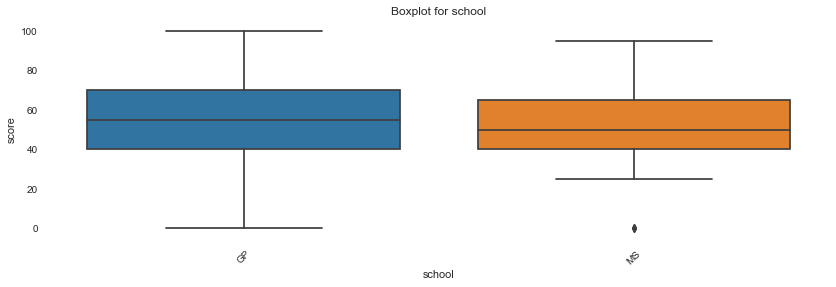

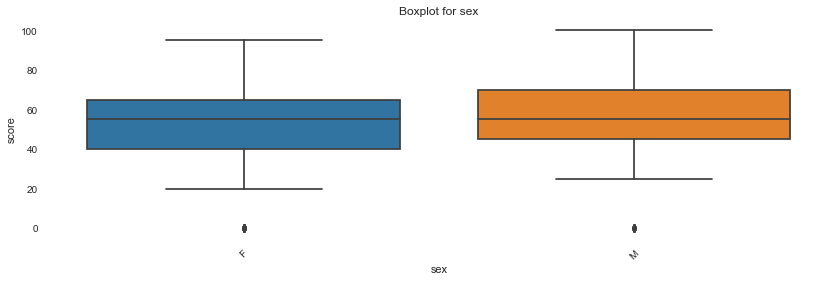

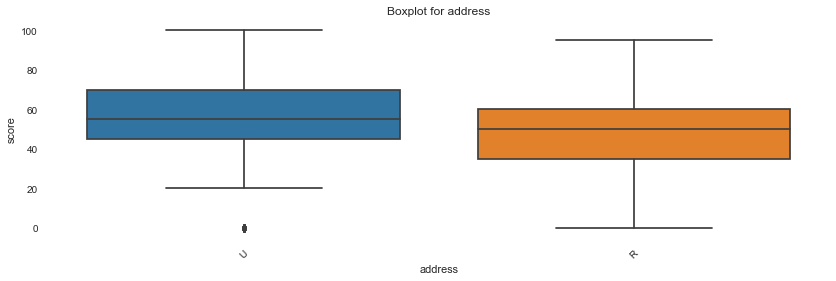

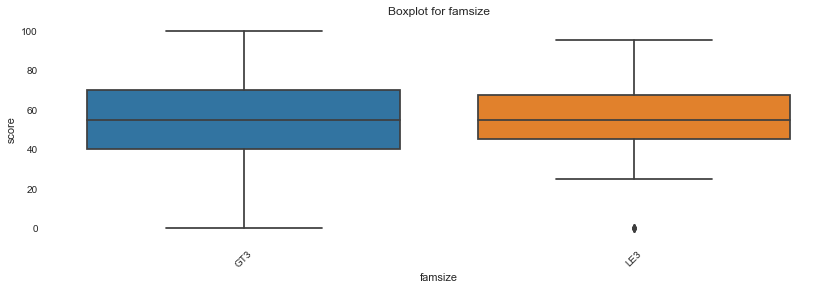

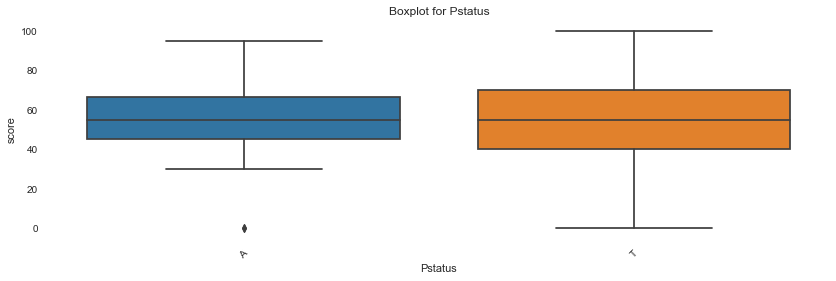

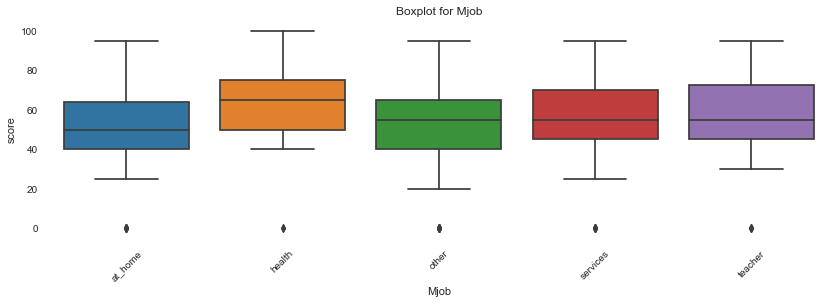

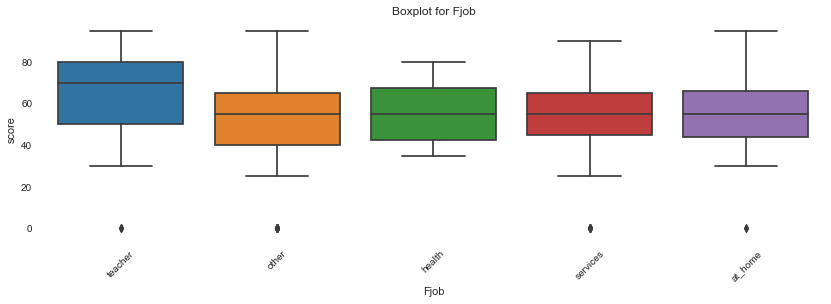

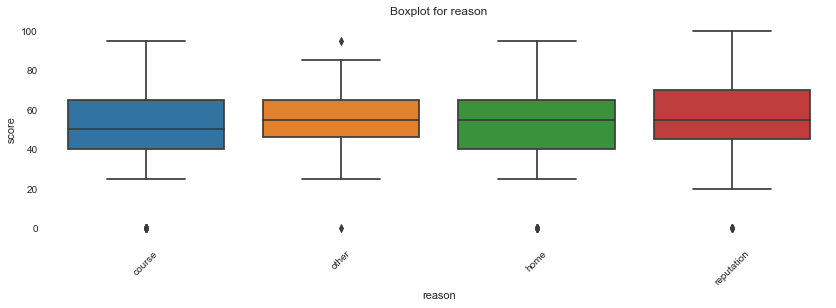

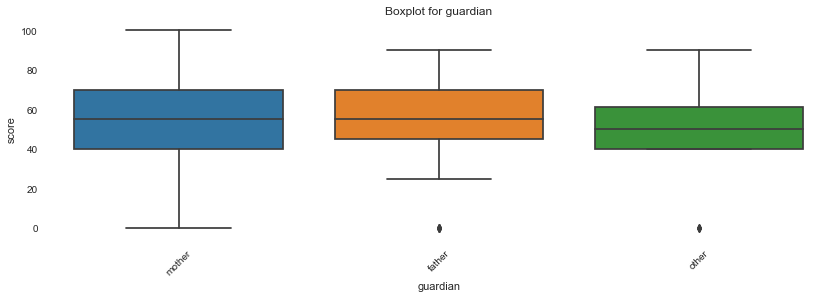

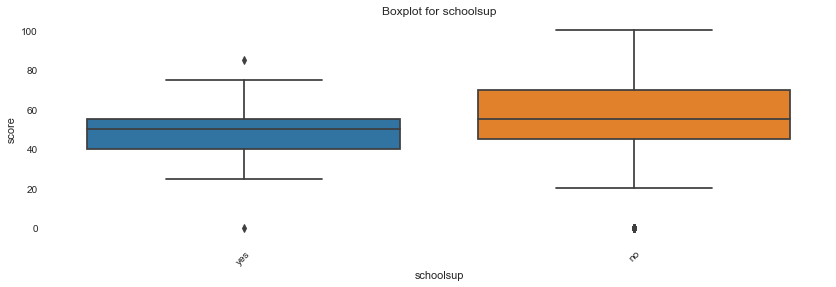

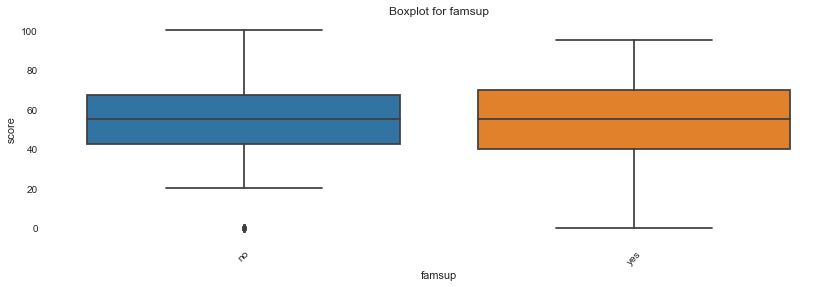

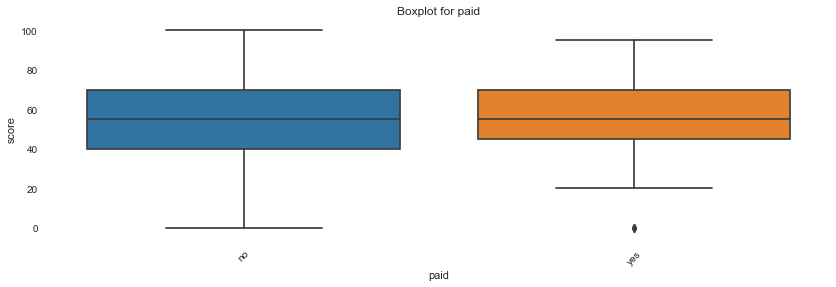

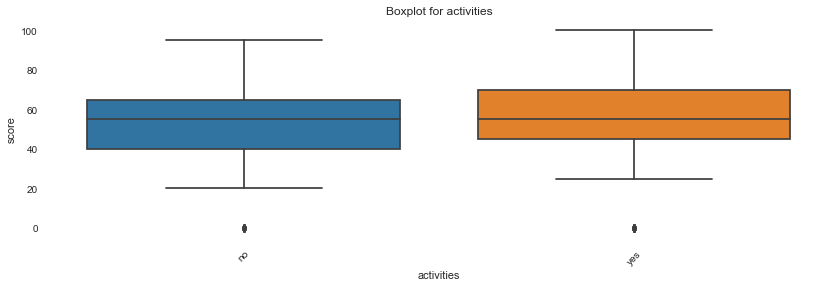

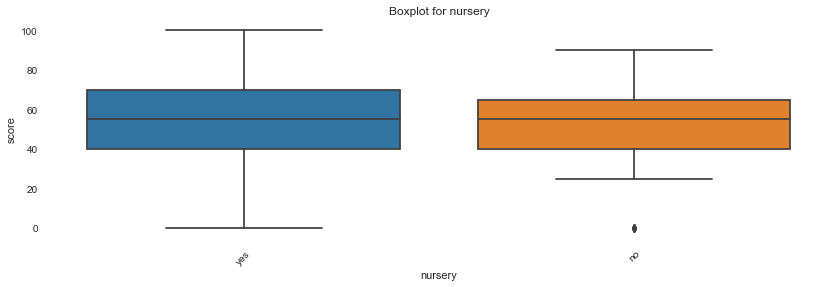

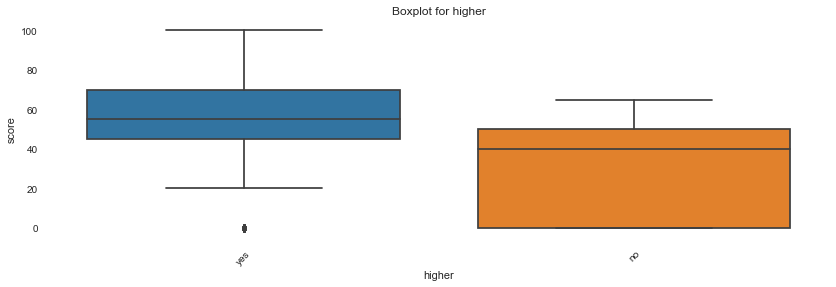

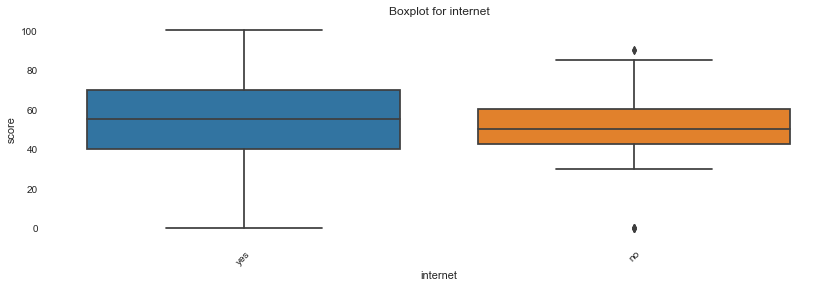

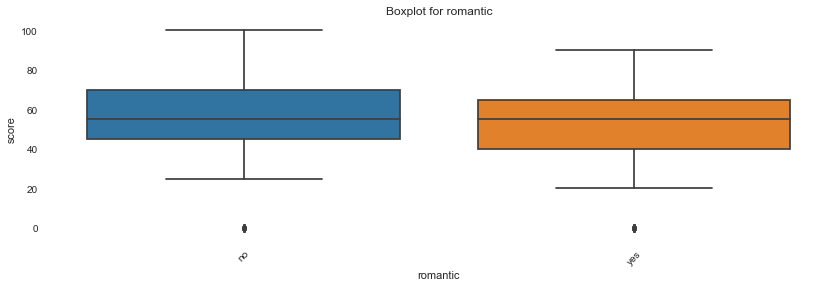

In [3]:
for cf in categorical_features:
   
    sf.get_boxplot(cf)

Однако такой анализ не может дать нам достаточжно оснований для принятия решения , какие из перемнных являются статистически значимыми , а какие нет. Из общей картины можно понять ,что 3 переменных могут влиять на оценку (Fjob,Mjob, higher)


Длай более полной картины, воспользуемся тестом  Стьюдента и посмотрим подтверждает ли он наше предположение?

In [3]:
for col in list(categorical_features):
    sf.get_stat_dif(col)

Найдены статистически значимые различия для колонки Mjob


Получается , что из трех переменных, которые мы определили , как значимые в прдыдущем тесте - осталась только одна.То есть , на оценку по математике существенно влияет профессия матери , а на box - plot  мы выделиь, что профессия эта : учитель . Что ж, весомый аргумент. 
Удалим все ненужное:

In [9]:
for column in [
'school','sex','address','famsize','Pstatus','Fjob','reason','guardian','schoolsup',
 'famsup','paid','activities','nursery','higher','internet','romantic'
]:
    students.drop([column], inplace = True, axis = 1)